Preguntas nuevas:

- ¿Cual es el ratio de hombres y mujeres segun el perfil?
- ¿Cual es perfil educativo para cada puesto?
- Herramientas mas utilizadas segun los perfiles. 
- ¿Cuál es la diferencia de salarios entre hombres y mujeres segun el perfil?
- Perfil segun pais que herramientas usan, en coparativa con España.


Extras:
- ¿Cómo se distribuye este porcentaje segun los paises?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
df = pd.read_pickle("data/data_limpieza.pickle")

In [3]:
df.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,No (we do not use ML methods),25000-29999,$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,We are exploring ML methods (and may one day p...,60000-69999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999


In [4]:
df.sample(5)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max
24530,24530,24530,572,25-29,Man,India,Master’s degree,Student,3-5 years,Python,...,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",University Courses (resulting in a university ...,NaN,NaN,NaN
3189,3189,3189,731,25-29,Man,India,Bachelor’s degree,Data Scientist,< 1 years,Python,...,I do not know,7500-9999,"$100,000 or more ($USD)","Basic statistical software (Microsoft Excel, G...","Python, SQL","Visual Studio ,PyCharm , Spyder,Jupyter Notebo...","Kaggle Learn Courses,University Courses (resul...","GitHub , Colab",Amazon Web Services (AWS),9999
9132,9132,9132,773,50-54,Man,Argentina,Some college/university study without earning ...,Other,3-5 years,Python,...,No (we do not use ML methods),4000-4999,$100-$999,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Kaggle Learn Courses,University Courses (resul...","GitHub , Kaggle",NaN,4999
6384,6384,6384,168,18-21,Man,India,Bachelor’s degree,Student,1-3 years,Python,...,NaN,NaN,NaN,NaN,"Python, R, SQL","RStudio ,PyCharm , Spyder,Jupyter Notebook",NaN,NaN,NaN,NaN
12450,12450,12450,386,40-44,Man,Ireland,Master’s degree,Student,< 1 years,C++,...,NaN,NaN,NaN,NaN,C,MATLAB,University Courses (resulting in a university ...,NaN,NaN,NaN


In [5]:
df[df["salario"] == "1000000"].count()

level_0                  0
index                    0
time                     0
age                      0
gender                   0
pais                     0
formacion                0
puesto                   0
experiencia_prog         0
lenguaje_top             0
exp_ml                   0
tamaño_empresa           0
uso_ml                   0
salario                  0
inversion_ml             0
ppal_herramienta_data    0
lenguaje_prog            0
plataforma               0
plat_cursos              0
nubes                    0
plataforma_top           0
salario_max              0
dtype: int64

In [6]:
df["salario_max"].isnull().sum()

10582

In [7]:
df["salario"].isnull().sum()

10582

In [8]:
df.dtypes

level_0                   int64
index                     int64
time                      int64
age                      object
gender                   object
pais                     object
formacion                object
puesto                   object
experiencia_prog         object
lenguaje_top             object
exp_ml                   object
tamaño_empresa           object
uso_ml                   object
salario                  object
inversion_ml             object
ppal_herramienta_data    object
lenguaje_prog            object
plataforma               object
plat_cursos              object
nubes                    object
plataforma_top           object
salario_max              object
dtype: object

In [9]:
pd.to_numeric(df["salario_max"], errors = "coerce")

0        29999.0
1        69999.0
2          999.0
3        39999.0
4        39999.0
          ...   
25968    19999.0
25969        NaN
25970      999.0
25971        NaN
25972      999.0
Name: salario_max, Length: 25973, dtype: float64

In [10]:
df.dtypes

level_0                   int64
index                     int64
time                      int64
age                      object
gender                   object
pais                     object
formacion                object
puesto                   object
experiencia_prog         object
lenguaje_top             object
exp_ml                   object
tamaño_empresa           object
uso_ml                   object
salario                  object
inversion_ml             object
ppal_herramienta_data    object
lenguaje_prog            object
plataforma               object
plat_cursos              object
nubes                    object
plataforma_top           object
salario_max              object
dtype: object

In [11]:
def salario_max(col):
    try:
        return int(col)

    except:
        return np.nan

In [12]:
df["salario_max"] = df["salario_max"].apply(salario_max)

In [13]:
df.dtypes

level_0                    int64
index                      int64
time                       int64
age                       object
gender                    object
pais                      object
formacion                 object
puesto                    object
experiencia_prog          object
lenguaje_top              object
exp_ml                    object
tamaño_empresa            object
uso_ml                    object
salario                   object
inversion_ml              object
ppal_herramienta_data     object
lenguaje_prog             object
plataforma                object
plat_cursos               object
nubes                     object
plataforma_top            object
salario_max              float64
dtype: object

In [14]:
df["salario_max"].isnull().sum()

10582

In [15]:
df.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,No (we do not use ML methods),25000-29999,$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999.0
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,We are exploring ML methods (and may one day p...,60000-69999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999.0


In [16]:
df["salario_max"].isnull().value_counts()

False    15391
True     10582
Name: salario_max, dtype: int64

In [17]:
df_estudiantes = df[df["puesto"] == "Student"]

In [18]:
df_estudiantes.shape

(6804, 22)

In [19]:
df_estudiantes["salario_max"].isnull().sum()

6804

In [20]:
df_other = df[df["puesto"] == "Other"]

In [21]:
df_other.shape

(2393, 22)

In [22]:
df_other["salario_max"].isnull().sum()

189

In [23]:
df_desem = df[df["puesto"] == "Currently not employed"]

In [24]:
df_desem.shape

(1986, 22)

In [25]:
df_desem["salario_max"].isnull().sum()

1986

In [58]:
df["rango_salario"] = pd.cut(df["salario_max"], 12, right = True, labels = ["Salario muy bajo", "Salario bajo", "Salario bajo-medio", "Salario bajo-medio", "Salario medio", "Salario medio-alto", "Salario alto", "Salario alto", "Salario muy alto", "Salario muy alto", "Salario altísimo", "Salario altísimo"], ordered = False)

In [59]:
df.sample(10)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario
25909,25909,25909,204,25-29,Woman,India,Master’s degree,Data Analyst,< 1 years,Python,...,NaN,NaN,NaN,"Python, SQL",Jupyter Notebook,NaN,NaN,NaN,NaN,NaN
12434,12434,12434,429,18-21,Man,India,Bachelor’s degree,Student,1-3 years,Python,...,NaN,NaN,"Business intelligence software (Salesforce, Ta...","Python, SQL, C++","Visual Studio Code (VSCode) ,Jupyter Notebook",Udemy,NaN,NaN,NaN,NaN
8815,8815,8815,378,18-21,Man,India,Some college/university study without earning ...,Currently not employed,3-5 years,Python,...,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NaN,NaN,NaN,NaN,NaN
18195,18195,18195,854,40-44,Man,Other,Bachelor’s degree,Program/Project Manager,1-3 years,Python,...,5000-7499,$100-$999,"Basic statistical software (Microsoft Excel, G...",Python,MATLAB,LinkedIn Learning,Other,NaN,7499.0,Salario muy bajo
25596,25596,25596,496,18-21,Man,Pakistan,Bachelor’s degree,Data Scientist,1-3 years,Python,...,1000-1999,"$1000-$9,999","Basic statistical software (Microsoft Excel, G...","SQL, C, C++, Java","PyCharm , Notepad++","Kaggle Learn Courses,Udemy",GitHub,VMware Cloud,1999.0,Salario muy bajo
12583,12583,12583,8220,25-29,Man,Mexico,Doctoral degree,Data Scientist,< 1 years,Python,...,0-999,$0 ($USD),"Local development environments (RStudio, Jupyt...",Python,Spyder,University Courses (resulting in a university ...,NaN,NaN,999.0,Salario muy bajo
3898,3898,3898,521,25-29,Man,Germany,Master’s degree,Research Scientist,3-5 years,Python,...,10000-14999,$100-$999,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, Java","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Udemy,LinkedIn Learning,University Courses (re...","GitHub , Kaggle , Colab",NaN,14999.0,Salario muy bajo
25001,25001,25001,58753,35-39,Man,Ukraine,Doctoral degree,Software Engineer,10-20 years,Python,...,80000-89999,"$1000-$9,999","Local development environments (RStudio, Jupyt...","Python, SQL, Javascript, Bash, Other","Visual Studio Code (VSCode) , Vim / Emacs,Jupy...",Kaggle Learn Courses,I do not share my work publicly,NaN,89999.0,Salario bajo
18944,18944,18944,459289,40-44,Man,India,Bachelor’s degree,Currently not employed,< 1 years,Python,...,NaN,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"Visual Studio ,Jupyter Notebook","Kaggle Learn Courses,DataCamp",NaN,NaN,NaN,NaN
6736,6736,6736,710,22-24,Man,India,Master’s degree,Data Analyst,< 1 years,Python,...,0-999,"$1000-$9,999","Local development environments (RStudio, Jupyt...",Python,Jupyter Notebook,University Courses (resulting in a university ...,GitHub,NaN,999.0,Salario muy bajo


In [26]:
df["salario_max"].value_counts()

999.0        3369
1999.0        969
14999.0       950
39999.0       741
124999.0      725
7499.0        699
59999.0       697
49999.0       688
24999.0       587
2999.0        575
19999.0       573
9999.0        552
69999.0       551
29999.0       470
79999.0       464
4999.0        456
199999.0      392
89999.0       391
3999.0        380
149999.0      379
99999.0       350
249999.0      177
499999.0       91
299999.0       75
1000000.0      58
999999.0       32
Name: salario_max, dtype: int64

In [27]:
df_salarios_pais= pd.DataFrame(df.groupby(['pais','gender', 'puesto'])['salario_max'].mean().round(2))

In [28]:
pd.set_option('display.max_rows', None)

df_salarios_pais.sort_values('salario_max', ascending= True)

#### Filtrar paises para quedarnos solo con Europa a la hora de analizar los sueldos, para luego poder categorizarlos con el .cut() y comparar la diferencia entre generos y/o por puestos.

categorizar los salarios (confiamos en el .cut())
el cosito del KNN para los nulos!!!


In [30]:
$ pip install a-world-of-countries  # Instalador de libreria para poder clasificar los  paises por continentes

SyntaxError: invalid syntax (3754623592.py, line 1)

In [ ]:
# Import the AWOC package.
import awoc

# Initialize the AWOC class.
my_world = awoc.AWOC()

In [ ]:
europa= my_world.get_countries_list_of('Europe')

In [ ]:
europa

['Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Faroe Islands',
 'Finland',
 'France',
 'Germany',
 'Gibraltar',
 'Greece',
 'Guernsey',
 'Hungary',
 'Iceland',
 'Ireland',
 'Isle of Man',
 'Italy',
 'Jersey',
 'Kosovo',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Svalbard and Jan Mayen',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom',
 'Vatican']

In [ ]:
for x in df['pais']:
   for i in europa: 
        if x in (europa):
            df['europa']= 'SI'
        else:
            df['europa']= 'NO'

KeyboardInterrupt: 

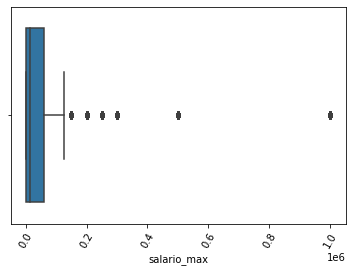

In [33]:
sns.boxplot(x= "salario_max", data = df)
plt.xticks(rotation = 60); 

#### Ver si podemos hacer la iteracion con un apply u otro metodo.

In [ ]:
df['europa'].unique()

array(['NO'], dtype=object)

¿Qué logramos en este sprint?:
- Lenguaje_prog
- Salario_max (casi lo hemos conseguido categorizar)
- Varias visualizaciones (gráficas)
- Separar salarios por países
- Importar la librería de europa y filtrar los datos por Europa
- Profundizar en las preguntas y aproximarnos a la elaboración de dataframes al respecto de ellas

Próximos objetivos:
- Filtrar por todos los países de Europa
- Terminar de acordar los dataframes a las preguntas
- Elaborar las conclusiones de cada pregunta
- Organizar los archivos por preguntas (por ejemplo) o por tipo (EDA o limpieza) y hacer el README
- Presentación